In [6]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Example:   NIST Engineering Statistics Handbook:  The data set includes ten measurements of gear diameter for each of ten batches for a total of 100 measurements. 

A one-way analysis of variance was generated for the GEAR.DAT data set.

H0: All individual batch means are equal.
HA: At least one batch mean is not equal to the others.

In [10]:
gears = pd.read_csv('Gear.csv')
print(gears)

    diameter  batch
0      1.006      1
1      0.996      1
2      0.998      1
3      1.000      1
4      0.992      1
..       ...    ...
95     0.997     10
96     0.991     10
97     0.998     10
98     1.004     10
99     0.997     10

[100 rows x 2 columns]


In [11]:
gears["batch"]=gears["batch"].astype("category")

Text(24.847222222222214, 0.5, 'diameter')

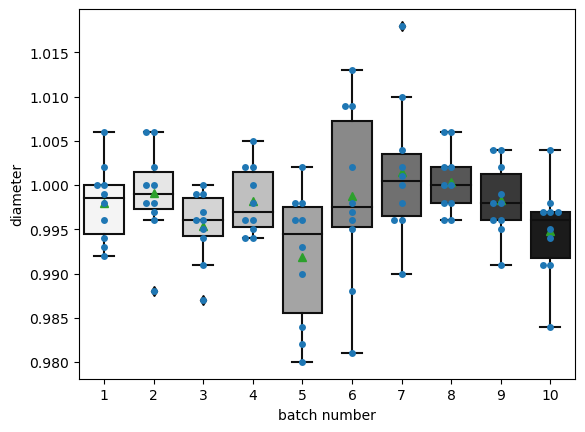

In [12]:
# Plot the data to visualize
ax=sns.boxplot(x=gears["batch"], y= gears["diameter"], data=gears,showmeans=True,palette="Greys")
ax=sns.swarmplot(x=gears["batch"], y= gears["diameter"], data=gears)
plt.xlabel("batch number")
plt.ylabel("diameter")

What assumptions do you have to review?

NIST Handbook: Purpose:
Test for Homogeneity of Variances	Levene's test ( Levene 1960) is used to test if k samples have equal variances. Equal variances across samples is called homogeneity of variance. Some statistical tests, for example the analysis of variance, assume that variances are equal across groups or samples. The Levene test can be used to verify that assumption.

In [13]:
gears.describe()

,diameter
count,100.000000
mean,0.997640
std,0.006279
min,0.980000
25%,0.995000
50%,0.998000
75%,1.001250
max,1.018000


In [14]:
gearGrouped = pd.read_csv('GearGrouped.csv')
gearGrouped

,1,2,3,4,5,6,7,8,9,10
0,1.006,0.998,0.991,1.005,0.998,1.009,0.990,0.998,1.002,0.991
1,0.996,1.006,0.987,1.002,0.998,1.013,1.004,1.000,0.998,0.995
2,0.998,1.000,0.997,0.994,0.982,1.009,0.996,1.006,0.996,0.984
3,1.000,1.002,0.999,1.000,0.990,0.997,1.001,1.000,0.995,0.994
4,0.992,0.997,0.995,0.995,1.002,0.988,0.998,1.002,0.996,0.997
5,0.993,0.998,0.994,0.994,0.984,1.002,1.000,0.996,1.004,0.997
6,1.002,0.996,1.000,0.998,0.996,0.995,1.018,0.998,1.004,0.991
7,0.999,1.000,0.999,0.996,0.993,0.998,1.010,0.996,0.998,0.998
8,0.994,1.006,0.996,1.002,0.980,0.981,0.996,1.002,0.999,1.004
9,1.000,0.988,0.996,0.996,0.996,0.996,1.002,1.006,0.991,0.997


In [15]:
gearGrouped.describe()

,1,2,3,4,5,6,7,8,9,10
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.998000,0.999100,0.995400,0.998200,0.991900,0.998800,1.001500,1.000400,0.998300,0.994800
std,0.004346,0.005216,0.003978,0.003853,0.007578,0.009886,0.007878,0.003627,0.004138,0.005329
min,0.992000,0.988000,0.987000,0.994000,0.980000,0.981000,0.990000,0.996000,0.991000,0.984000
25%,0.994500,0.997250,0.994250,0.995250,0.985500,0.995250,0.996500,0.998000,0.996000,0.991750
50%,0.998500,0.999000,0.996000,0.997000,0.994500,0.997500,1.000500,1.000000,0.998000,0.996000
75%,1.000000,1.001500,0.998500,1.001500,0.997500,1.007250,1.003500,1.002000,1.001250,0.997000
max,1.006000,1.006000,1.000000,1.005000,1.002000,1.013000,1.018000,1.006000,1.004000,1.004000


In [16]:
scipy.stats.levene(gearGrouped["1"],gearGrouped["2"],gearGrouped["3"],gearGrouped["4"],gearGrouped["5"],gearGrouped["6"],gearGrouped["7"],gearGrouped["8"],gearGrouped["9"],gearGrouped["10"],center='median')

LeveneResult(statistic=1.7059176930008937, pvalue=0.0990829755522046)

We are testing the hypothesis that the group variances are equal. We fail to reject the null hypothesis at the 0.05 significance level since the value of the Levene test statistic is less than the critical value. We conclude that there is insufficient evidence to claim that the variances are not equal.

Levene's test can be used to answer the following question:
Is the assumption of equal variances valid?

or can judge the largest std to the smallest std.

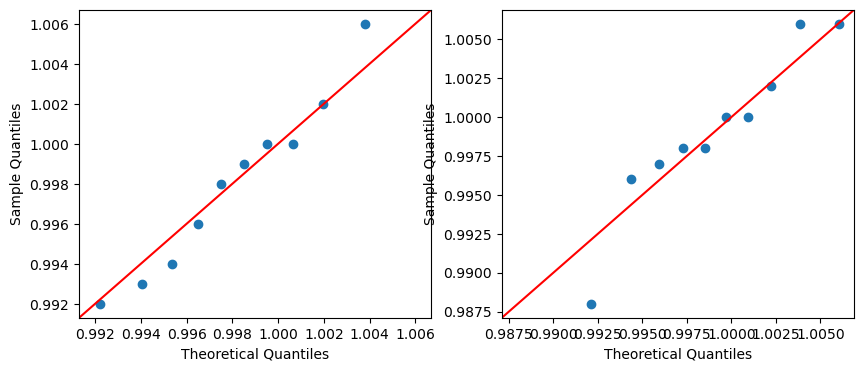

In [17]:
gearGrouped["1"].sort_values()
gearGrouped["2"].sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(gearGrouped["1"],line='45',loc=np.mean(gearGrouped["1"]),scale=np.std(gearGrouped["1"],ddof=1),ax=ax2[0])
sm.qqplot(gearGrouped["2"],line='45',loc=np.mean(gearGrouped["2"]),scale=np.std(gearGrouped["2"],ddof=1),ax=ax2[1])
plt.show()

The ANOVA table decomposes the variance into the following component sum of squares:

- Total sum of squares. The degrees of freedom for this entry is the number of observations minus one.

- Sum of squares for the factor. The degrees of freedom for this entry is the number of levels minus one. The mean square is the sum of squares divided by the number of degrees of freedom.

- Residual sum of squares. The degrees of freedom is the total degrees of freedom minus the factor degrees of freedom. The mean square is the sum of squares divided by the number of degrees of freedom.

The sums of squares summarize how much of the variance in the data (total sum of squares) is accounted for by the factor effect (batch sum of squares) and how much is random error (residual sum of squares). Ideally, we would like most of the variance to be explained by the factor effect.

The ANOVA table provides a formal F test for the factor effect. For our example, we are testing the following hypothesis.

      H0: All individual batch means are equal.
      Ha: At least one batch mean is not equal to the others.

In [18]:
stats.f_oneway(gearGrouped["1"],gearGrouped["2"],gearGrouped["3"],gearGrouped["4"],gearGrouped["5"],gearGrouped["6"],gearGrouped["7"],gearGrouped["8"],gearGrouped["9"],gearGrouped["10"])

F_onewayResult(statistic=2.296912413358539, pvalue=0.022660819278641355)

In [19]:
TotalSS= np.sum((gears["diameter"]-gears["diameter"].mean())**2)
TotalSS

0.0039030399999999965

In [20]:
gearGroupedMean=gearGrouped.mean()
gearGroupedMean

1     0.9980
2     0.9991
3     0.9954
4     0.9982
5     0.9919
6     0.9988
7     1.0015
8     1.0004
9     0.9983
10    0.9948
dtype: float64

In [21]:
BetweenSS=np.sum(((gearGroupedMean-gears["diameter"].mean())**2)*10)
BetweenSS

0.0007290400000000008

In [22]:
MSBetween=BetweenSS/9
MSBetween

8.100444444444453e-05

In [23]:
WithinSS_1=np.sum((gearGrouped["1"]-np.mean(gearGrouped["1"]))**2)
WithinSS_2=np.sum((gearGrouped["2"]-np.mean(gearGrouped["2"]))**2)
WithinSS_3=np.sum((gearGrouped["3"]-np.mean(gearGrouped["3"]))**2)
WithinSS_4=np.sum((gearGrouped["4"]-np.mean(gearGrouped["4"]))**2)
WithinSS_5=np.sum((gearGrouped["5"]-np.mean(gearGrouped["5"]))**2)
WithinSS_6=np.sum((gearGrouped["6"]-np.mean(gearGrouped["6"]))**2)
WithinSS_7=np.sum((gearGrouped["7"]-np.mean(gearGrouped["7"]))**2)
WithinSS_8=np.sum((gearGrouped["8"]-np.mean(gearGrouped["8"]))**2)
WithinSS_9=np.sum((gearGrouped["9"]-np.mean(gearGrouped["9"]))**2)
WithinSS_10=np.sum((gearGrouped["10"]-np.mean(gearGrouped["10"]))**2)
WithinSS=(WithinSS_1+WithinSS_2+WithinSS_3+WithinSS_4+WithinSS_5+WithinSS_6+WithinSS_7+WithinSS_8+WithinSS_9+WithinSS_10)
WithinSS

0.0031739999999999963

In [24]:
MSWithin=WithinSS/90
MSWithin

3.5266666666666625e-05

In [25]:
F_statistic=MSBetween/MSWithin
F_statistic

2.2969124133585432

The F statistic is the batch mean square divided by the residual mean square. 

This statistic follows an F distribution with (k-1) and (N-k) degrees of freedom. For our example, the critical F value (upper tail) for α = 0.05, (k-1) = 9, and (N-k) = 90 is 1.9856. 

Since the F statistic, 2.2969, is greater than the critical value, we conclude that there is a significant batch effect at the 0.05 level of significance.

Or find the exact p-value associated with the test statistic  
:  cdf(x, dfn, dfd, loc=0, scale=1)

In [26]:
from scipy.stats import f

In [27]:
f.ppf(0.95,9,90)

1.985594963730501

In [28]:
1-f.cdf(F_statistic,9,90)

0.022660819278641053

Once we have determined that there is a significant batch effect, we might be interested in comparing individual batch means. The batch means and the standard errors of the batch means provide some information about the individual batches. However, we may want to employ multiple comparison methods for a more formal analysis.

n choose k:  45 pairwise comparisons

Tukeys test (Honest Significant Difference) is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.

It compares all possible pairs of means, and is based on a studentized range distribution (q :this distribution is similar to the distribution of t from the t-test).

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [30]:
mult_comp=pairwise_tukeyhsd(endog=gears['diameter'], groups=gears['batch'], alpha=0.05)
print(mult_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0011    1.0 -0.0075 0.0097  False
     1      3  -0.0026 0.9928 -0.0112  0.006  False
     1      4   0.0002    1.0 -0.0084 0.0088  False
     1      5  -0.0061 0.4013 -0.0147 0.0025  False
     1      6   0.0008    1.0 -0.0078 0.0094  False
     1      7   0.0035 0.9469 -0.0051 0.0121  False
     1      8   0.0024  0.996 -0.0062  0.011  False
     1      9   0.0003    1.0 -0.0083 0.0089  False
     1     10  -0.0032 0.9698 -0.0118 0.0054  False
     2      3  -0.0037 0.9263 -0.0123 0.0049  False
     2      4  -0.0009    1.0 -0.0095 0.0077  False
     2      5  -0.0072 0.1852 -0.0158 0.0014  False
     2      6  -0.0003    1.0 -0.0089 0.0083  False
     2      7   0.0024  0.996 -0.0062  0.011  False
     2      8   0.0013    1.0 -0.0073 0.0099  False
     2      9  -0.0008    1.0 -0.0094 0.0078  False
     2     1

In [31]:
mult_comp.confint

array([[-0.00751659,  0.00971659],
       [-0.01121659,  0.00601659],
       [-0.00841659,  0.00881659],
       [-0.01471659,  0.00251659],
       [-0.00781659,  0.00941659],
       [-0.00511659,  0.01211659],
       [-0.00621659,  0.01101659],
       [-0.00831659,  0.00891659],
       [-0.01181659,  0.00541659],
       [-0.01231659,  0.00491659],
       [-0.00951659,  0.00771659],
       [-0.01581659,  0.00141659],
       [-0.00891659,  0.00831659],
       [-0.00621659,  0.01101659],
       [-0.00731659,  0.00991659],
       [-0.00941659,  0.00781659],
       [-0.01291659,  0.00431659],
       [-0.00581659,  0.01141659],
       [-0.01211659,  0.00511659],
       [-0.00521659,  0.01201659],
       [-0.00251659,  0.01471659],
       [-0.00361659,  0.01361659],
       [-0.00571659,  0.01151659],
       [-0.00921659,  0.00801659],
       [-0.01491659,  0.00231659],
       [-0.00801659,  0.00921659],
       [-0.00531659,  0.01191659],
       [-0.00641659,  0.01081659],
       [-0.00851659,

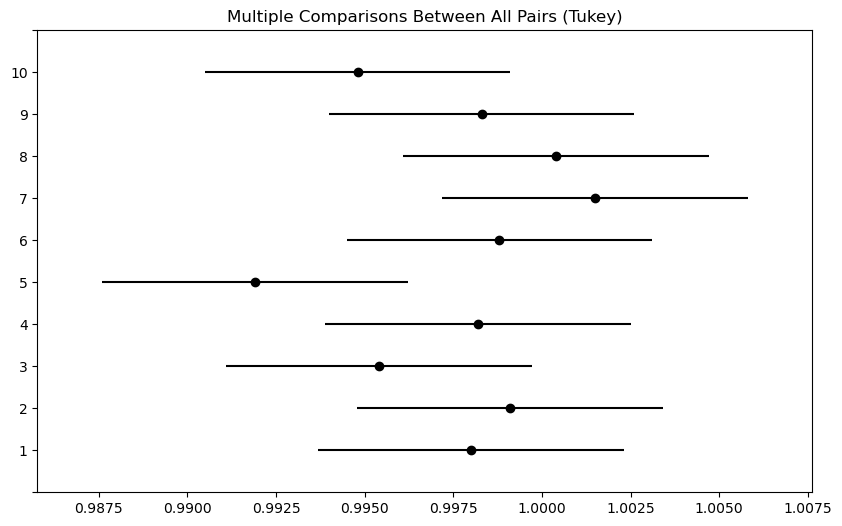

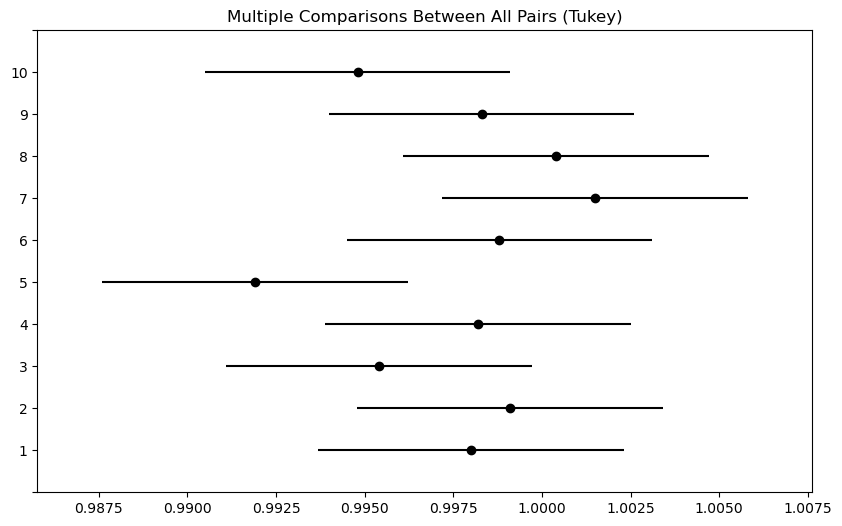

In [32]:
mult_comp.plot_simultaneous()

In [33]:
#import statsmodels.stats.multicomp as mc
#comp = mc.MultiComparison(gears['diameter'], gears['batch'])
#tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
#tbl

# General linear model

The general linear model (GLM) is the conventional linear regression model for a continuous response variable given continuous and/or categorical predictors. It includes simple linear regression, multiple linear regression, as well as ANOVA. 

For simple linear regression with categorical batch number predicting diameter and dummy coding of the category:

<AxesSubplot:xlabel='batch', ylabel='diameter'>

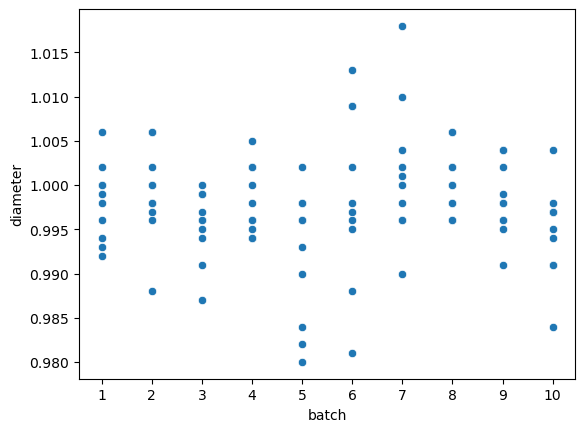

In [50]:
sns.scatterplot(x=gears["batch"], y= gears["diameter"], data=gears)

In [51]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [55]:
#fit the simple linear regression model to the batch as a categorical data type.  
model=ols('diameter~batch',data=gears)
results=model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.105     
Dependent Variable: diameter         AIC:                -732.0056 
Date:               2023-06-26 13:59 BIC:                -705.9539 
No. Observations:   100              Log-Likelihood:     376.00    
Df Model:           9                F-statistic:        2.297     
Df Residuals:       90               Prob (F-statistic): 0.0227    
R-squared:          0.187            Scale:              3.5267e-05
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.9980    0.0019  531.4328  0.0000   0.9943   1.0017
batch[T.10]    -0.0032    0.0027   -1.2049  0.2314  -0.0085   0.0021
batch[T.2]      0.0011    0.0027    0.4142  0.6797  -0.0042   0.0064
batch[T.3]     -0.0026    0.0027   -0.9790  0.3302  -0.0079   0.0027
batch[T.4]      0.0002    0.0027    0.0753  0.9401  -0.0051   0.0055
batch[T.5]     -0.0061    0.0027   -2.2968  0.0239  -0.0114  -0.0008
batch[T.6]      0.0008    0.0027    0.3012  0.7639  -0.0045   0.0061
batch[T.7]      0.0035    0.0027    1.3179  0.1909  -0.0018   0.0088
batch[T.8]      0.0024    0.0027    0.9037  0.3686  -0.0029   0.0077
batch[T.9]      0.0003    0.0027    0.1130  0.9103  -0.0050   0.0056
-------------------------------------------------------------------
Omnibus:               3.129         Durbin-Watson:           1.774
Prob(Omnibus):         0.209         Jarque-Bera (JB):        3.153
Skew:                  -0.082        Prob(JB):                0.207
Kurtosis:              3.854         Condition No.:           11   
===================================================================

"""

In [56]:
gearGrouped.describe()

,1,2,3,4,5,6,7,8,9,10
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.998000,0.999100,0.995400,0.998200,0.991900,0.998800,1.001500,1.000400,0.998300,0.994800
std,0.004346,0.005216,0.003978,0.003853,0.007578,0.009886,0.007878,0.003627,0.004138,0.005329
min,0.992000,0.988000,0.987000,0.994000,0.980000,0.981000,0.990000,0.996000,0.991000,0.984000
25%,0.994500,0.997250,0.994250,0.995250,0.985500,0.995250,0.996500,0.998000,0.996000,0.991750
50%,0.998500,0.999000,0.996000,0.997000,0.994500,0.997500,1.000500,1.000000,0.998000,0.996000
75%,1.000000,1.001500,0.998500,1.001500,0.997500,1.007250,1.003500,1.002000,1.001250,0.997000
max,1.006000,1.006000,1.000000,1.005000,1.002000,1.013000,1.018000,1.006000,1.004000,1.004000


In [57]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
batch,9.0,0.000729,0.000081,2.296912,0.022661
Residual,90.0,0.003174,0.000035,NaN,NaN


https://www.itl.nist.gov/div898/handbook/eda/section3/eda354.htm

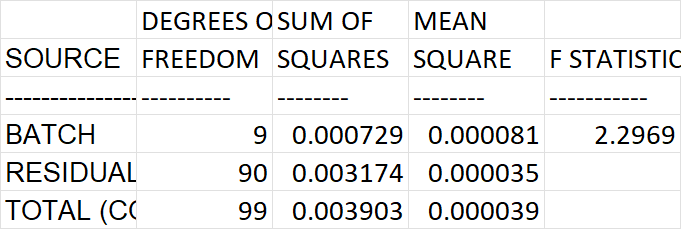